In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import objective_functions.ridge_logistic as r

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *
from read_data import *
from plots_and_weights.optimality_gaps import *
from plots_and_weights.plot_graph import *

In [2]:
# https://www.causality.inf.ethz.ch/data/SIDO.html
mat = scipy.io.loadmat('datasets/sido0_matlab/sido0_train.mat')

targets = []
with open('datasets/sido0_matlab/sido0_train.targets', 'r') as file:
    for line in file:
        targets.append(line.strip())      
targets = [int(t) for t in targets]

In [3]:
A = np.array(mat['X'].toarray())
b = np.array(targets)
n, d = A.shape

In [4]:
sparsity = np.count_nonzero(A)
print(f'Sparsity of a9a: {sparsity}')

Sparsity of a9a: 6155080


In [5]:
n, d = A.shape 
A = np.hstack((np.ones((n, 1)), A)) 
d = d + 1  
sum_of_squares = (A**2).sum(axis=0)

# print(np.count_nonzero(sum_of_squares == 0))
sum_of_squares[sum_of_squares == 0] = 1

normalization_factor = np.sqrt(sum_of_squares)

A /= normalization_factor

In [6]:
n, d = A.shape
rl = r.Ridge_Logistic_Regression(5)
st = 50 # stop time
sss = [int(0.01 * n), int(0.05 * n), int(0.1 * n)]  # sampling size
# sss = [int(0.05 * n), int(0.1 * n)]
lambd = 5
alpha = 1

# w, t = newton(A, b, np.zeros(d), rl, lambd, 1, 150, True)
# w_stars = w[len(t)-1]

In [7]:
# np.save('w_stars_sido0.npy', w_stars)
w_stars = np.load('w_stars_sido0.npy')

In [8]:
w0, t0 = newton(A, b, np.zeros(d), rl, lambd, alpha, st, False)
w2, t2 = gd(A, b, np.zeros(d), rl, lambd, 0.05, st)
w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, 0.05, -1, st)

Newton computation time: 53.03280568122864
GD computation time: 50.04083585739136
Nesterov GD computation time: 50.04833197593689


Sub-sampled Newton rnss computation time: 50.16999816894531
Nesterov Sub-sampled Newton rnss computation time: 51.29166603088379
Sub-sampled Newton rnss computation time: 50.86419892311096
Nesterov Sub-sampled Newton rnss computation time: 51.13467288017273
Sub-sampled Newton rnss computation time: 51.197914838790894
Nesterov Sub-sampled Newton rnss computation time: 50.8306770324707


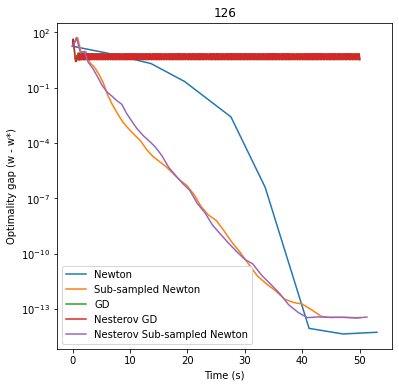

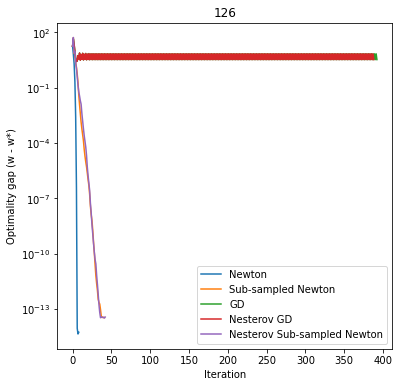

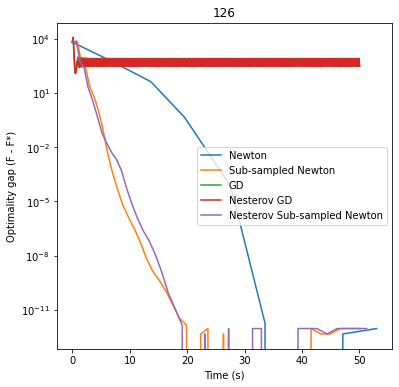

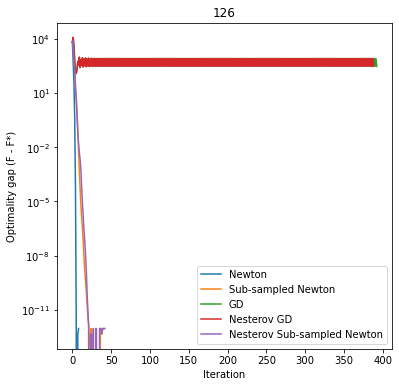

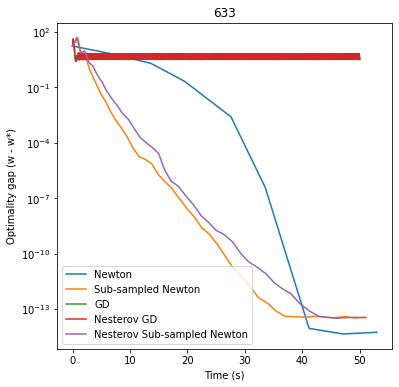

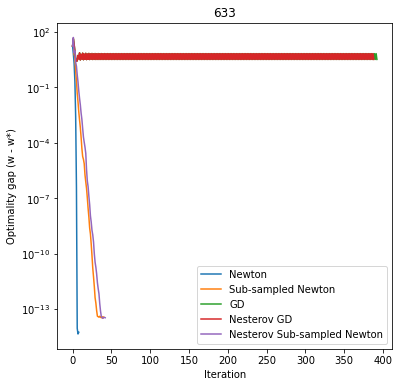

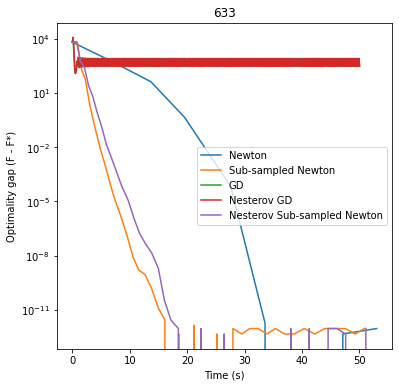

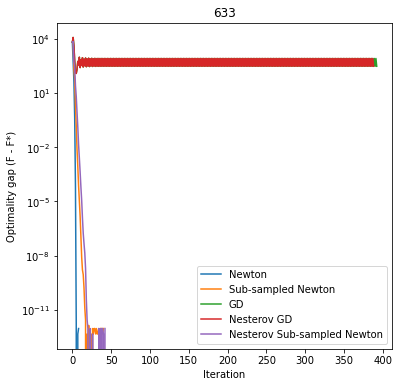

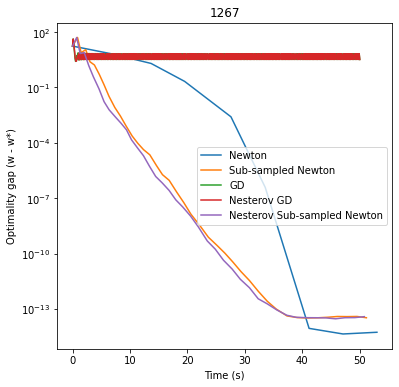

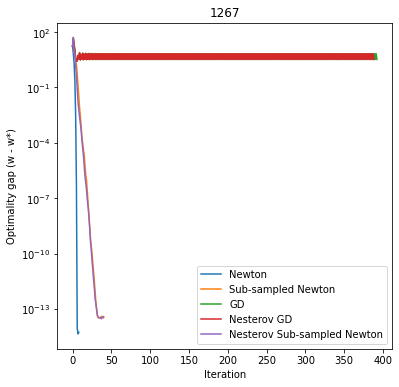

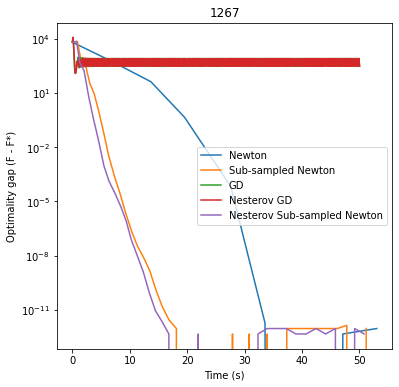

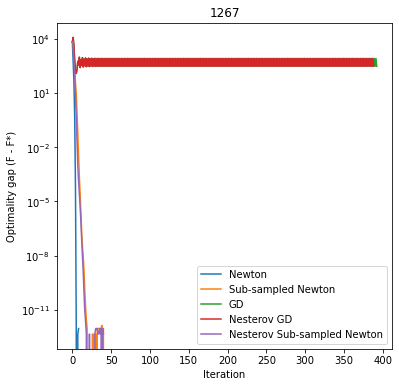

In [9]:
for ss in sss:
    w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, st, sss[0])
#     w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, 0.14, st, sss[0])
    w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, -1, st, sss[0])
    ws = [w0,w1,w2,w3,w4]
    ts = [t0,t1,t2,t3,t4]
#     ws = [[],w1,[],[],w4]
#     ts = [[],t1,[],[],t4]
#     ws = [w0,[],w2,w3,[]]
#     ts = [t0,[],t2,t3,[]]
    ts_iters = [np.arange(len(t)) for t in ts]
    
    w_gaps = compute_w_gaps(ws, ts, w_stars)
    plot_graph(ts, w_gaps, 'Time (s)', 'Optimality gap (w - w*)', str(ss))
    plot_graph(ts_iters, w_gaps, 'Iteration', 'Optimality gap (w - w*)', str(ss))
    
    
    f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, rl)
    plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)', str(ss))
    plot_graph(ts_iters, f_gaps, 'Iteration', 'Optimality gap (F - F*)', str(ss))

In [10]:
w0

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([-0.64053093, -0.06629959, -0.01092335, ..., -0.05644776,
         0.08185451, -0.00598958]),
 array([-0.79576307, -0.12882755, -0.0302628 , ..., -0.10689902,
         0.11078815, -0.02367693]),
 array([-0.8524376 , -0.1559633 , -0.0395835 , ..., -0.1411621 ,
         0.12007347, -0.04200069]),
 array([-0.85951589, -0.15917057, -0.0410745 , ..., -0.14609928,
         0.12100492, -0.04481668]),
 array([-0.85960462, -0.15921034, -0.04109731, ..., -0.14616323,
         0.12101459, -0.0448535 ]),
 array([-0.85960463, -0.15921035, -0.04109732, ..., -0.14616324,
         0.12101459, -0.0448535 ]),
 array([-0.85960463, -0.15921035, -0.04109732, ..., -0.14616324,
         0.12101459, -0.0448535 ]),
 array([-0.85960463, -0.15921035, -0.04109732, ..., -0.14616324,
         0.12101459, -0.0448535 ])]

In [11]:
w3

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.61419913, -0.75940007, -0.55743059, ..., -0.80024326,
        -0.30030209, -0.46204869]),
 array([-1.76042903, -0.50023293, -0.32075182, ..., -0.53119992,
        -0.03437122, -0.28241443]),
 array([-1.12989662, -0.30751494, -0.14441949, ..., -0.33071081,
         0.16407407, -0.14836807]),
 array([-0.88103408, -0.21477936, -0.06467331, ..., -0.22604406,
         0.18692279, -0.0852643 ]),
 array([-0.90168264, -0.2051201 , -0.06701175, ..., -0.20483238,
         0.12135728, -0.07962649]),
 array([-0.74899857, -0.1512836 , -0.01638367, ..., -0.14707819,
         0.18332005, -0.03850186]),
 array([-1.00494426, -0.22031131, -0.0910697 , ..., -0.21110778,
         0.06047098, -0.0884862 ]),
 array([-0.71972579, -0.13508642, -0.00512465, ..., -0.12607232,
         0.20126422, -0.02447286]),
 array([-1.08200557, -0.23943407, -0.1118175 , ..., -0.22869866,
         0.03905645, -0.1012078 ]),
 array([-0.73251493, -0.13793368, -0.00955847, ..., 

In [12]:
# lambdas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
# cns = []
# for l in lambdas:
#     cn = r.Ridge_Logistic_Regression(l).condition_num(A, b, np.zeros(d))
#     cns.append(cn)
# print(cns)

In [13]:
# fig = plt.figure(figsize=(12, 6)) # set figure size
# plt.xscale('log')
# plt.xlabel('Lambda')
# plt.ylabel('Condition Number')
# plt.plot(lambdas, cns)